Machine Learning Final Project

-- Pre Processing Data

In [139]:
#!pip install pandas scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or RandomForestRegressor for regression
from sklearn.metrics import accuracy_score  # or mean_squared_error for regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [140]:
df = pd.read_csv('/Users/karukavina/Documents/VSCODEFiles/ML/ML-Final-Project/student-mat.csv', sep=';')
print(df.head())
# had to seperate by ; instead of the default , bc that is standard practice is european countries

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \


In [141]:
# Data Cleaning and preprocessing

# Drop G1 and G2 to avoid data leakage
df = df.drop(columns=['G1', 'G2'])

# Binary Encoding for yes/no and binary features
binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup',
                  'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'F': 0, 'M': 1, 'U': 1, 'R': 0, 'LE3': 0, 'GT3': 1, 'T': 1, 'A': 0})

# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'], drop_first=True)

print(df.head())



   sex  age  address  famsize  Pstatus  Medu  Fedu  traveltime  studytime  \
0    0   18        1        1        0     4     4           2          2   
1    0   17        1        1        1     1     1           1          2   
2    0   15        1        0        1     1     1           1          2   
3    0   15        1        1        1     4     2           1          3   
4    0   16        1        1        1     3     3           1          2   

   failures  schoolsup  famsup  paid  activities  nursery  higher  internet  \
0         0          1       0     0           0        1       1         0   
1         0          0       1     0           0        0       1         1   
2         3          1       0     1           0        1       1         1   
3         0          0       1     1           1        1       1         1   
4         0          0       1     1           0        1       1         0   

   romantic  famrel  freetime  goout  Dalc  Walc  health  abse

UNSUPERVISED MODEL
*kmeans clustering*

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

In [143]:
#drop the target variable
df_unsupervised = df.drop(columns=['G3'], errors = 'ignore')

In [144]:
#converting one hot encoding to binary
binary_columns_one_hot = ['Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other']

for col in binary_columns_one_hot:
    df_unsupervised[col] = df_unsupervised[col].map({True: 1, False: 0})

In [164]:
df_unsupervised

In [146]:
#standard scaler standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_unsupervised)

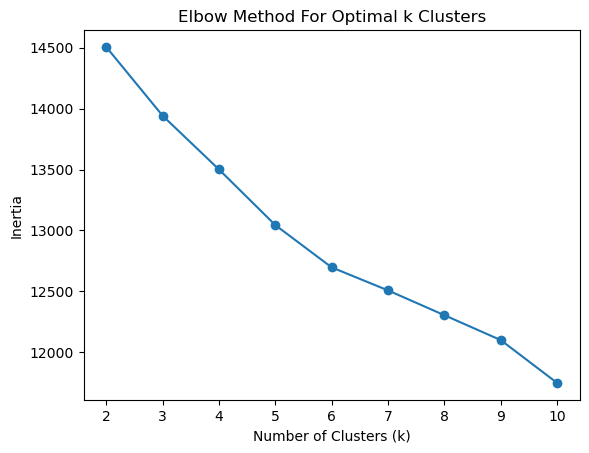

In [147]:
#elbow method, choosing k- optimal # of clusters
inertia = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k Clusters')
plt.show()

#elbow = where inertia drops and starts to levels off
#drop off = 6

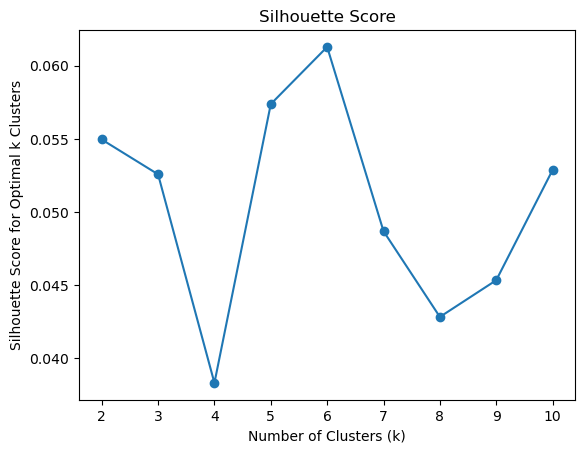

In [148]:
#silhouette score
scores = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score for Optimal k Clusters')
plt.title('Silhouette Score')
plt.show()

#silhouette = peak value
#score = 6

k chosen is 6

In [149]:
#fit model with chosen k value, predict + assign clusters
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [150]:
#cluster labels added to dataframe
df['Cluster'] = clusters

In [151]:
#avg value for each feature in each cluster, student profiles
cluster_summary = df.groupby('Cluster').mean()
pd.set_option('display.max_columns', None)
print(cluster_summary)


              sex        age   address   famsize   Pstatus      Medu  \
Cluster                                                                
0        0.387097  16.483871  0.838710  0.752688  0.903226  2.817204   
1        0.441176  16.352941  0.911765  0.705882  0.911765  3.647059   
2        0.385965  16.535088  0.833333  0.728070  0.885965  2.359649   
3        0.864865  17.945946  0.621622  0.675676  0.945946  1.756757   
4        0.666667  16.523810  0.793651  0.634921  0.888889  3.952381   
5        0.333333  16.962963  0.555556  0.722222  0.870370  2.166667   

             Fedu  traveltime  studytime  failures  schoolsup    famsup  \
Cluster                                                                   
0        2.763441    1.279570   2.182796  0.322581   0.161290  0.720430   
1        2.941176    1.205882   2.000000  0.235294   0.058824  0.764706   
2        2.236842    1.377193   2.166667  0.263158   0.175439  0.578947   
3        1.540541    2.027027   1.297297  1.3243

In [152]:
#amount of students per cluster
cluster_sizes = df['Cluster'].value_counts()
cluster_sizes

Cluster
2    114
0     93
4     63
5     54
3     37
1     34
Name: count, dtype: int64

In [166]:
#boxplots of each feature by clusters
features = [
    'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
    'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
    'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
    'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
    'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
    'reason_home', 'reason_other', 'reason_reputation',
    'guardian_mother', 'guardian_other'
]

#for feature in features:
    #sns.boxplot(x='Cluster', y=feature, data=df)
    #plt.title(f'Comparison of {feature} Across Clusters')
    #plt.savefig(f'boxplot_{feature}.png', dpi=300, bbox_inches='tight') #saving images
    #plt.show()

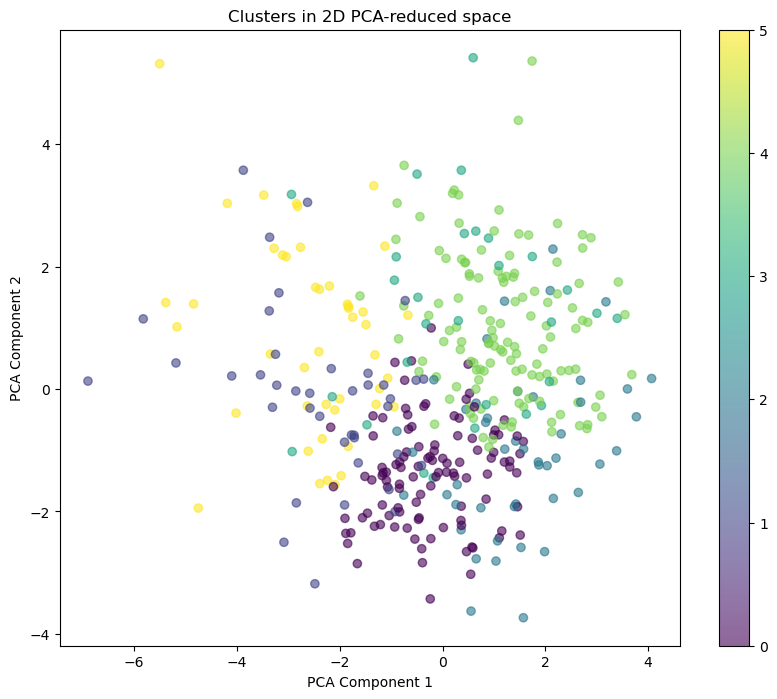

In [168]:
from sklearn.decomposition import PCA
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, alpha=0.6, cmap='viridis')
plt.colorbar(scatter)
plt.title('Clusters in 2D PCA-reduced space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()